# Random Graphs

In [1]:
using Plots
using LightGraphs
using Statistics: mean
using Combinatorics: combinations

In [2]:
Threads.nthreads()

8

## Average Properties of random graphs

> Erdos and Renyi proved that many important properties of a graph **appear suddenly**. This means that, while a random graph with $N$ nodes and a certain number of edges is unlikely to have a given property at hand, a random graph with a few more edges is likely to have that property.

In [9]:
N = 10_000
nodes = 1:N
# Maximum number of connections
M = N * (N - 1) / 2

4.9995e7

In [10]:
"""
Simulate an Erdos-Renyi model A     
"""
function er_model_a(N, p)
    nodes = 1:N
    G = SimpleGraph(N)
    for (n1, n2) in combinations(nodes, 2)
        if p > rand()
            add_edge!(G, n1, n2)
        end
    end
    return G
end

"""
Compute the proportion of nodes in the largest component
of an Erdos-Renyi
"""
function in_largest_component(N, p)
    G = er_model_a(N, p)
    components = connected_components(G)
    vmax, idxmax = findmax([length(component) for component in components])
    return vmax / N
end

in_largest_component

For example, we consider the property

In [ ]:
k_values = 0:0.1:5
nk_values = length(k_values)
n_sims = 5
Q_values = zeros(nk_values, n_sims)

@time begin
    Threads.@threads for ix=1:nk_values
        k = k_values[ix]
        p = k / N
        for nsim=1:n_sims
            Q_samp = in_largest_component(N, p)
            Q_values[ix, nsim] = Q_samp
        end
    end
end

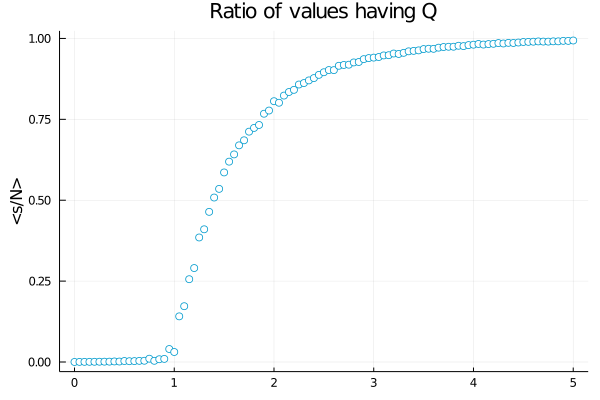

In [8]:
scatter(k_values, mean(Q_values, dims=2), label=nothing, markercolor=:white, markerstrokecolor=:deepskyblue3)
plot!(title="Ratio of values having Q", ylabel="<s/N>")